<a href="https://colab.research.google.com/github/princenishad5471/Projects_Resume_Tnp/blob/main/Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

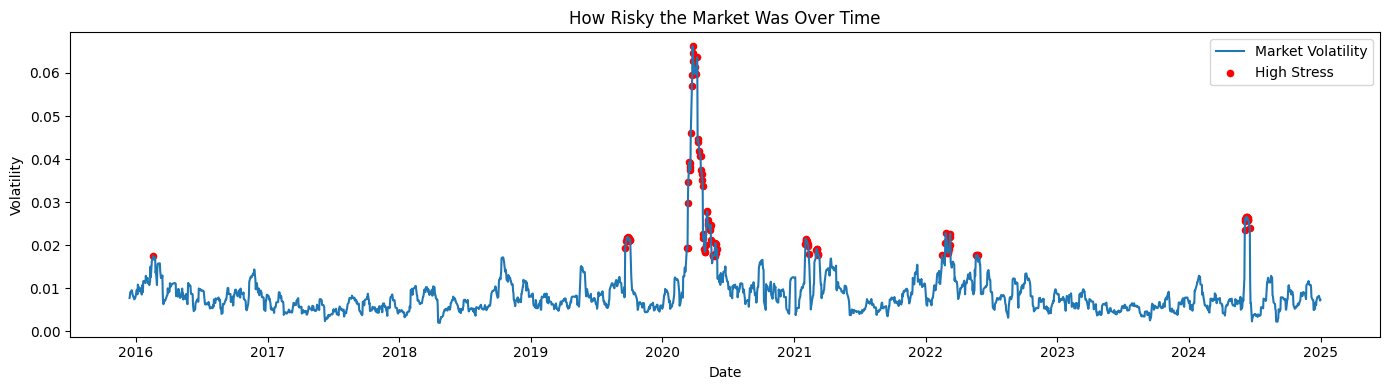

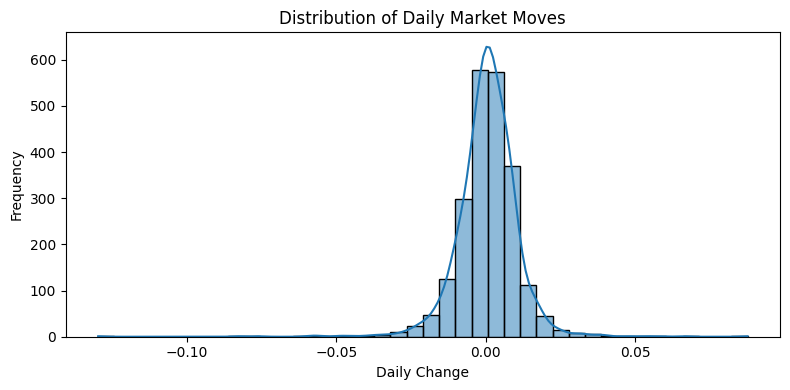


High Market Stress Days per Year:


,date,High Stress Days
0,2016,1
1,2019,10
2,2020,52
3,2021,13
4,2022,15
5,2024,10


In [11]:
# ======================================================
# NIFTY 50 – SIMPLE MARKET ANALYSIS (DA / BA FRIENDLY)
# ======================================================

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

# ------------------------------------------------------
# 1. Load Market Data
# ------------------------------------------------------

START_DATE = "2015-12-01"
END_DATE = "2025-01-01"

# NIFTY 50
nifty = yf.download("^NSEI", start=START_DATE, end=END_DATE, progress=False)
nifty.reset_index(inplace=True)
nifty = nifty[["Date", "Close"]]
nifty.columns = ["date", "price"]

# USD-INR
usd_inr = yf.download("INR=X", start=START_DATE, end=END_DATE, progress=False)
usd_inr.reset_index(inplace=True)
usd_inr = usd_inr[["Date", "Close"]]
usd_inr.columns = ["date", "usd_inr"]

# ------------------------------------------------------
# 2. Simple Calculations (Easy to Explain)
# ------------------------------------------------------

# Daily price change
nifty["daily_change"] = nifty["price"].pct_change()

# Market volatility (10-day rolling)
nifty["volatility"] = nifty["daily_change"].rolling(10).std()

# Simple rule: high risk when volatility is very high
average_volatility = nifty["volatility"].mean()
nifty["high_volatility"] = nifty["volatility"] > (average_volatility * 2)

nifty.dropna(inplace=True)

# ------------------------------------------------------
# 3. Important Events (Human Language)
# ------------------------------------------------------

events = pd.DataFrame({
    "date": pd.to_datetime([
        "2016-11-08",
        "2020-03-24",
        "2022-02-24",
        "2022-05-04",
        "2024-04-19"
    ]),
    "event": [
        "Demonetization",
        "COVID Lockdown",
        "Russia–Ukraine War",
        "Global Interest Rate Hikes",
        "Indian Elections"
    ]
})

# ------------------------------------------------------
# 4. VISUAL 1 — Interactive Price Chart (PLOTLY)
# ------------------------------------------------------

fig = px.line(
    nifty,
    x="date",
    y="price",
    title="NIFTY 50 Price Movement (2015–2025)"
)

# Highlight risky periods in red
fig.add_scatter(
    x=nifty[nifty["high_volatility"]]["date"],
    y=nifty[nifty["high_volatility"]]["price"],
    mode="markers",
    marker=dict(color="red", size=6),
    name="High Market Stress"
)

# Add event lines + labels (FIXED for Plotly)
for _, row in events.iterrows():
    fig.add_vline(
        x=row["date"].to_pydatetime(),
        line_dash="dash"
    )
    fig.add_annotation(
        x=row["date"].to_pydatetime(),
        y=nifty["price"].max(),
        text=row["event"],
        showarrow=False,
        textangle=90,
        yanchor="bottom"
    )

fig.update_layout(
    xaxis_title="Date",
    yaxis_title="NIFTY 50 Index",
    hovermode="x unified"
)

fig.show()

# ------------------------------------------------------
# 5. VISUAL 2 — Volatility Over Time (MATPLOTLIB)
# ------------------------------------------------------

plt.figure(figsize=(14, 4))
plt.plot(nifty["date"], nifty["volatility"], label="Market Volatility")

plt.scatter(
    nifty[nifty["high_volatility"]]["date"],
    nifty[nifty["high_volatility"]]["volatility"],
    color="red",
    s=20,
    label="High Stress"
)

plt.title("How Risky the Market Was Over Time")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.tight_layout()
plt.show()

# ------------------------------------------------------
# 6. VISUAL 3 — Daily Return Distribution (SEABORN)
# ------------------------------------------------------

plt.figure(figsize=(8, 4))
sns.histplot(nifty["daily_change"], bins=40, kde=True)
plt.title("Distribution of Daily Market Moves")
plt.xlabel("Daily Change")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# ------------------------------------------------------
# 7. VISUAL 4 — USD-INR Trend (CURRENCY IMPACT)
# ------------------------------------------------------

fig2 = px.line(
    usd_inr,
    x="date",
    y="usd_inr",
    title="USD–INR Exchange Rate (Rupee Movement)"
)

fig2.update_layout(
    xaxis_title="Date",
    yaxis_title="USD-INR"
)

fig2.show()

# ------------------------------------------------------
# 8. SIMPLE BUSINESS SUMMARY TABLE
# ------------------------------------------------------

summary = (
    nifty[nifty["high_volatility"]]
    .groupby(nifty["date"].dt.year)
    .size()
    .reset_index(name="High Stress Days")
)

print("\nHigh Market Stress Days per Year:")
display(summary)
